Questions for Divvy Data:

Points:
(1) Covid allegedly affected the number of bicyclists, because public transit was restricted and/or seen as dangerous. Many people tried to buy bicycles, but because of supply chain issues, many dealers couldn't get enough stock to satisify demand, so people may have turned to DIVVY as a stopgap measure.

(2) Covid also drastically reducted tourism throughout the summer of 2020, especially in Chicago, which had strong public health directives requiring masking.

Questions:
A) From 2019 to 2020, did Divvy use drop (because of business shut-downs) or increase (because people wanted to bike rather than public transit)? 

A1) Did the path of bike usage shift? (How to measure this? Aggregrate where bikes went from given stations?)

B) Did the proportion of "casual" (=non-member) users drop (#2) in 2020? Did it pick up in 2021?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
def getData(year,months=['01','02','03','04','05','06','07','08','09','10','11','12']):
    # procedure accepts year (as string) and optional list of months (strings) for which to retreive data
    # will return a df with the DIVVY data for that year and month(s)
    import pandas as pd

    if int(year) >= 2020:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/'
    else:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/pre2020/'

    fileName = year + months[0] + '-divvy-tripdata.json'
    print(fileName)
    retData = pd.read_json(workDir+fileName,orient='index')

    if len(months) > 0:
        for month in months[1:]:
                fileName = year + month + '-divvy-tripdata.json'
                print(fileName)
                newData = pd.read_json(workDir+fileName,orient='index')
                retData = pd.concat([retData,newData])

    return retData
       

In [24]:
data19 = getData('2019')
data19.shape

201901-divvy-tripdata.json
201902-divvy-tripdata.json
201903-divvy-tripdata.json
201904-divvy-tripdata.json
201905-divvy-tripdata.json
201906-divvy-tripdata.json
201907-divvy-tripdata.json
201908-divvy-tripdata.json
201909-divvy-tripdata.json
201910-divvy-tripdata.json
201911-divvy-tripdata.json
201912-divvy-tripdata.json


(3818004, 16)

In [25]:

data19['usertype'].value_counts(normalize=True)


Subscriber    0.769346
Customer      0.230654
Name: usertype, dtype: float64

<AxesSubplot:>

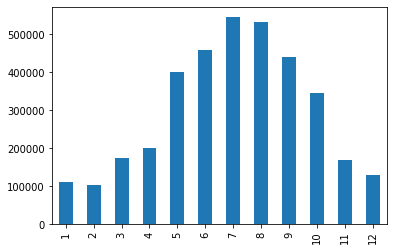

In [22]:
pd.DatetimeIndex(data18['start_time']).month.value_counts().sort_index().plot.bar()

In [26]:
pd.DatetimeIndex(data19['start_time']).month.value_counts().sort_index()

1     103272
2      96186
3     165611
4     265310
5     367458
6     475395
7     557315
8     590184
9     493219
10    371786
11    177176
12    155092
Name: start_time, dtype: int64

2017
1     111942
2     166343
3     153406
4     268662
5     345988
6     505164
7     565142
8     557639
9     485489
10    354104
11    189739
12    125396

2018
1     109706
2     102950
3     174489
4     200112
5     401150
6     458419
7     544703
8     530755
9     438112
10    344940
11    168774
12    128972

2019
1     103272
2      96186
3     165611
4     265310
5     367458
6     475395
7     557315
8     590184
9     493219
10    371786
11    177176
12    155092

2020
1     143884
2     139585
3     143418
4      84776
5     200274
6     343005
7     551480
8     622361
9     532958
10    388653
11    259716
12    131573

2021
1      96834
2      49622
3     228496
4     337230
5     531633
6     729595
7     822410
8     804352
9     756147
10    631226
11    359978
12    247540

<AxesSubplot:>

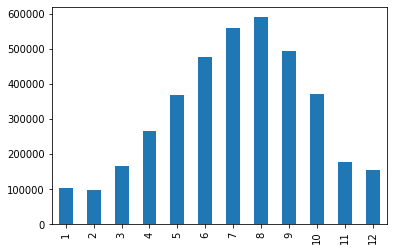

In [27]:
pd.DatetimeIndex(data19['start_time']).month.value_counts().sort_index().plot.bar()

In [3]:
data20 = getData('2020')
data20.shape

202001-divvy-tripdata.json
202002-divvy-tripdata.json
202003-divvy-tripdata.json
202004-divvy-tripdata.json
202005-divvy-tripdata.json
202006-divvy-tripdata.json
202007-divvy-tripdata.json
202008-divvy-tripdata.json
202009-divvy-tripdata.json
202010-divvy-tripdata.json
202011-divvy-tripdata.json
202012-divvy-tripdata.json


(3541683, 13)

<AxesSubplot:>

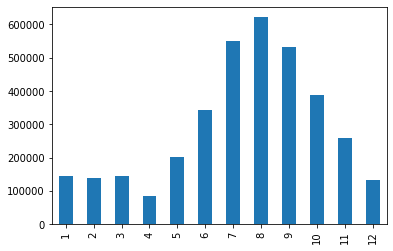

In [31]:
pd.DatetimeIndex(data20['started_at']).month.value_counts().sort_index().plot.bar()

In [19]:
data20['member_casual'].value_counts(normalize=True)

member    0.614145
casual    0.385855
Name: member_casual, dtype: float64

In [6]:
data20['rideable_type'].value_counts(normalize=True)

docked_bike      0.837546
electric_bike    0.142516
classic_bike     0.019939
Name: rideable_type, dtype: float64

In [4]:
data21 = getData('2021')
data21.shape

202101-divvy-tripdata.json
202102-divvy-tripdata.json
202103-divvy-tripdata.json
202104-divvy-tripdata.json
202105-divvy-tripdata.json
202106-divvy-tripdata.json
202107-divvy-tripdata.json
202108-divvy-tripdata.json
202109-divvy-tripdata.json
202110-divvy-tripdata.json
202111-divvy-tripdata.json
202112-divvy-tripdata.json


(5595063, 13)

In [11]:
pd.DatetimeIndex(data21['started_at']).month.value_counts().sort_index()

1      96834
2      49622
3     228496
4     337230
5     531633
6     729595
7     822410
8     804352
9     756147
10    631226
11    359978
12    247540
Name: started_at, dtype: int64

In [5]:
data21['member_casual'].value_counts(normalize=True)

member    0.547993
casual    0.452007
Name: member_casual, dtype: float64

In [6]:
data21['rideable_type'].value_counts(normalize=True)

classic_bike     0.581053
electric_bike    0.363122
docked_bike      0.055825
Name: rideable_type, dtype: float64

lets see how the usage pattern for electric vs classic bikes shifted over the 2021 year

In [11]:
def rideType(row):
    if row['rideable_type'] == 'electric_bike':
        return 1
    else:
        return 0

data21['electric'] = data21.apply(rideType, axis = 1)

<AxesSubplot:xlabel='started_at'>

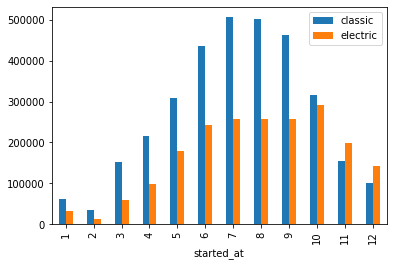

In [18]:
data21.pivot_table(index=pd.DatetimeIndex(data21['started_at']).month,
    values = ['classic','electric'],
    aggfunc='sum').plot.bar()